In [34]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [6]:
#importing dataframe
df = pd.read_csv('advertising_sales_data.csv')

In [8]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [10]:
#first few rows of dataframe
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [12]:
#descriptive statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,198.000000,200.000000,200.000000
mean,147.042500,23.260606,30.554000,15.130500
std,85.854236,14.921914,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.925000,12.750000,11.000000
50%,149.750000,22.400000,25.750000,16.000000
75%,218.825000,36.575000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
#to get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [16]:
#to find the datatype of each column
df.dtypes

Campaign      object
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [18]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['TV'].fillna(df['TV'].median(),inplace=True)
df['Radio'].fillna(df['Radio'].median(),inplace=True)
df['Newspaper'].fillna(df['Newspaper'].median(),inplace=True)
df['Sales'].fillna(df['Sales'].median(),inplace=True)

In [20]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [22]:
#average amount spent on TV advertising in the dataset
avg_amt_spent = df['TV'].mean()
print(f"Average amount spent on TV advertising: ${avg_amt_spent:.2f}")

Average amount spent on TV advertising: $147.04


          Radio     Sales
Radio  1.000000  0.349593
Sales  0.349593  1.000000


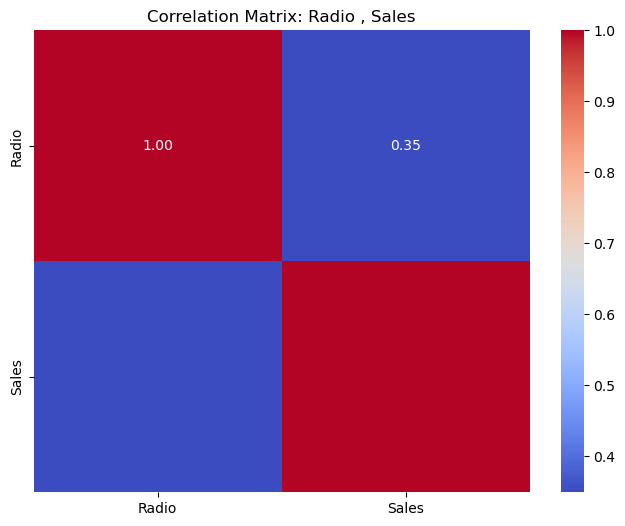

In [24]:
#correlation of radio advertising expenditure with sales
correlations = df[['Radio','Sales']].corr()
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Radio , Sales")
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054627   0.056648  0.901208
Radio      0.054627  1.000000   0.354595  0.349593
Newspaper  0.056648  0.354595   1.000000  0.157960
Sales      0.901208  0.349593   0.157960  1.000000


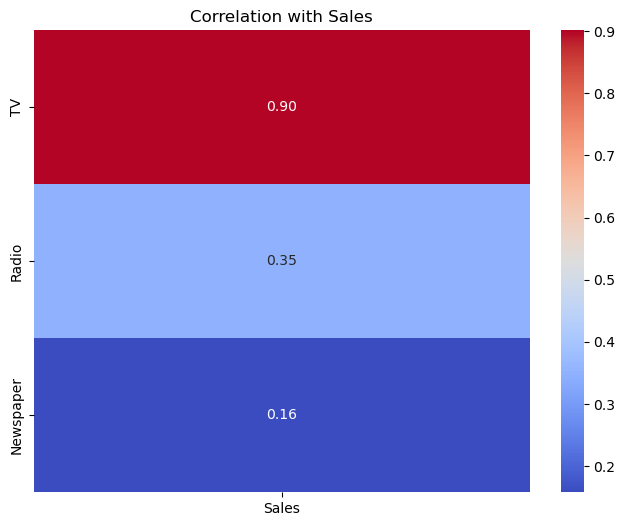

The advertising medium with the highest impact on sales is: TV


In [26]:
#advertising medium has the highest impact on sales
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Sales']].drop('Sales'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Sales")
plt.show()


correlations = correlation_matrix['Sales'].drop('Sales')
max_advertising = correlations.idxmax()
print(f"The advertising medium with the highest impact on sales is: {max_advertising}")

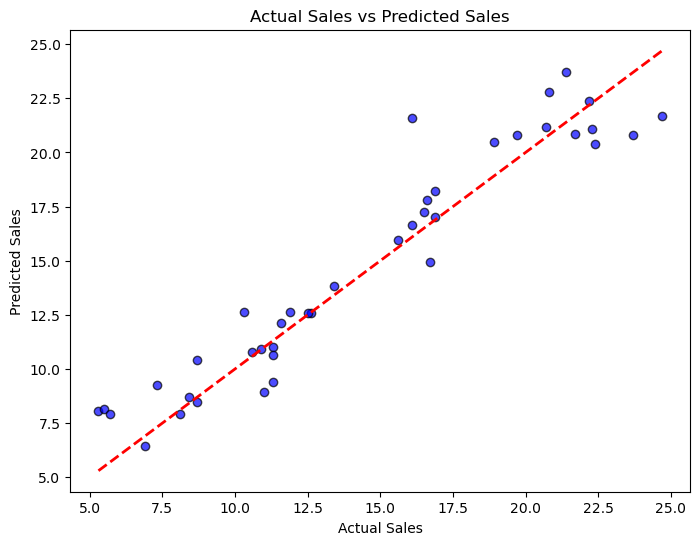

In [28]:
#Linear Regression 
# Independent variables
X = df[['TV', 'Radio', 'Newspaper']] 
 # Dependent variable
y = df['Sales'] 

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 4: Plot actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()


In [30]:
# Sales be predicted for a new set of advertising expenditures
new_set = np.array([[200, 40, 50]])
predicted_sales = model.predict(new_set)

print(f"Predicted sales for TV: $200, Radio: $40, Newspaper: $50 is: ${predicted_sales[0]:.2f}")

Predicted sales for TV: $200, Radio: $40, Newspaper: $50 is: $19.87


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
# Performance of the linear regression model change when the dataset is normalized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train, y_train)

y_pred_scaled = model_scaled.predict(X_test)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("With Normalization -> MSE:", round(mse_scaled, 2), "  R² Score:", round(r2_scaled, 2))

With Normalization -> MSE: 2.9   R² Score: 0.91


In [44]:
# impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

X_new = df[['Radio', 'Newspaper']]
y = df['Sales']

model_new = LinearRegression()
model_new.fit(X_new, y)

y_pred_new = model_new.predict(X_new)
mse_new = mean_squared_error(y, y_pred_new)
r2_new = r2_score(y, y_pred_new)

print("Using Radio & Newspaper only , MSE:", round(mse_new, 2), " R² Score:", round(r2_new, 2))

Using Radio & Newspaper only , MSE: 24.35  R² Score: 0.12
